#### We first import the required packages pandas, seaborn, numpy, sklearn, statsmodel to run the model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

#### Having imported our packages we then create a dataframe containing the content of the salary.csv .

In [2]:
data = pd.read_csv('CSV/salary.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


####  After import our CSV we notice that one salary value is missing from the dataframe hence it has 513 records instead of the 514. We chose to drop the one row believing that one record could not be significant to cause a change as our dataframe is large enough that the one record isn't as great of information loss. An alternative method was to give the median amount to the one salary but that could change the outcome as we seek more information that is precise and not a median.

In [4]:
data = data.dropna()
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [5]:
data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [6]:
data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


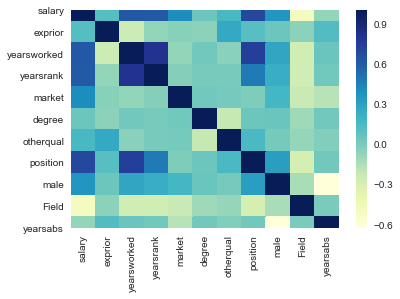

In [7]:
ax = sns.heatmap(data.corr(),cmap="YlGnBu")

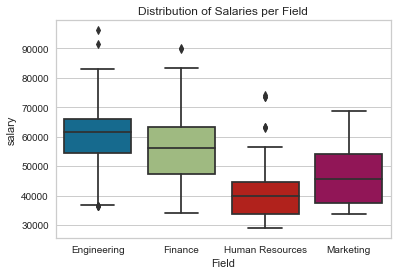

In [8]:
ax = sns.boxplot(data.Field,data.salary)
ax.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
plt.title('Distribution of Salaries per Field')
plt.show()

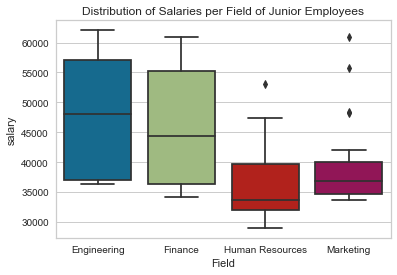

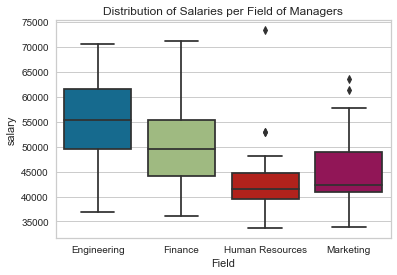

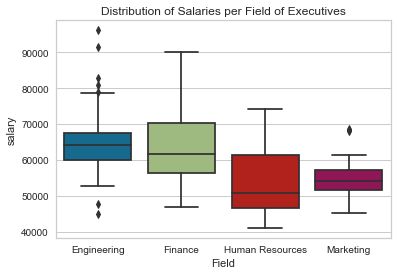

In [9]:
for i in range(1,4):
    position_df = data[data['position']==i]
    ax = sns.boxplot(position_df.Field,position_df.salary)
    ax.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
    if i == 1:
        plt.title('Distribution of Salaries per Field of Junior Employees')
    elif i == 2:
        plt.title('Distribution of Salaries per Field of Managers')
    else:
        plt.title('Distribution of Salaries per Field of Executives')
    plt.show()

# This is for Position

In [10]:
# x = data[['yearsworked','yearsrank','position']]
# y = data['salary']


In [11]:
# dummies = pd.get_dummies(data['position'])
# x = pd.concat([x,dummies],axis=1)

In [12]:
# x.rename(columns={1: "Junior Employee", 2: "Manager", 3: "Executive"},inplace=True)
# x = x.drop(['position','Junior Employee'], axis=1)
#x

# This is for Field

In [13]:
x = data[['yearsworked','yearsrank','Field']]
y = data['salary']

In [14]:
dummies = pd.get_dummies(data['Field'])
x = pd.concat([x,dummies],axis=1)

In [15]:
x.rename(columns={1: "Junior Employee", 2: "Manager", 3: "Executive"},inplace=True)
x = x.drop(['Field','Junior Employee'], axis=1)
#x

In [16]:
#to avoid Dummy Trap
# x = x[:,1:]
# print(x.shape)
# type(x[:,2])

In [17]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state = 10) 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(410, 5)
(410,)
(103, 5)
(103,)


In [18]:
regression = LinearRegression().fit(x_train, y_train)
#field_regression = LinearRegression().fit(x_train[['','']], y_train)
simple_regression = LinearRegression().fit(x_train[['yearsworked']], y_train)
predict_multi = regression.predict(x_test)
predict_simple = simple_regression.predict(x_test[['yearsworked']])

In [19]:
print('R2: ', regression.score(x_train,y_train))
print('R2: ', simple_regression.score(x_train[['yearsworked']],y_train))

R2:  0.6058551727615107
R2:  0.4468535652534289


In [20]:
print('TEST RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, regression.predict(x_test))))
print('TRAINING RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_train, regression.predict(x_train))))

TEST RMSE: 9876.987037998955
TRAINING RMSE: 7810.044425568562


In [21]:
print(x_test.shape)
print(predict_multi.shape)

(103, 5)
(103,)


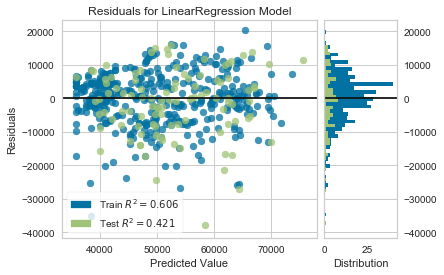

In [22]:
visualizer = ResidualsPlot(regression)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.show()

# Backward Elimination attempt using stats.models

In [23]:
x_train = np.append(arr = np.ones((len(x_train),1)).astype(int), values =x_train , axis = 1)

In [24]:
print(x_train.shape)
x_train
print(x_test.shape)

(410, 6)
(103, 5)


In [25]:
# this is for position
x_opt = x_train[:, [0, 1, 2, 3,4]]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()

In [26]:
# this is for field
x_opt = x_train[:, [0, 1, 2, 3,4,5]]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()

In [27]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     124.2
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           2.17e-79
Time:                        14:37:25   Log-Likelihood:                -4256.7
No. Observations:                 410   AIC:                             8525.
Df Residuals:                     404   BIC:                             8549.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.804e+04   1091.987     43.991      0.000    4.59e+04    5.02e+04
x1           462.1560     72.529      6.372      0.000     319.575     604.737
x2           406.2633    107.328      3.785      0.000     195.273     617.254
x3         -2762.2124   1142.871     -2.417      0.016   -5008.930    -515.495
x4         -1.224e+04   1158.982    -10.563      0.000   -1.45e+04   -9964.263
x5         -9720.9657   1135.970     -8.557      0.000    -1.2e+04   -7487.815
==============================================================================
Omnibus:                       47.464   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.646
Skew:                           0.749   Prob(JB):                     1.02e-16
Kurtosis:                       4.437   Cond. No.                         86.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
predict = regressor_OLS.predict(x_opt)
x_test = np.append(arr = np.ones((len(x_test),1)).astype(int), values =x_test , axis = 1)
#predict_x_test =  regressor_OLS.predict(x_test)
x_test.shape

(103, 6)

In [29]:
predict_x_test =  regressor_OLS.predict(x_test)


Text(0.5, 1.0, 'Residual Plot of Actual Salary vs Predicted Salary')

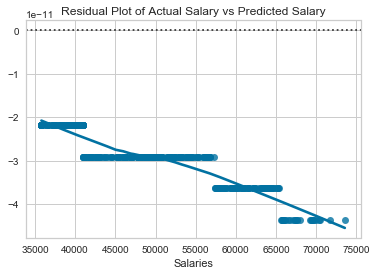

In [30]:
fitted_values = sm.regression.linear_model.RegressionResults.fittedvalues(regressor_OLS)
sns.residplot(fitted_values,predict,lowess=True)
plt.xlabel('Salaries')
plt.title('Residual Plot of Actual Salary vs Predicted Salary')